# Throughput Comparison

These are the baseline performance tests for several SSD drives so that we can create the performance envelope and specify the target numbers that we can see underneath the file system when generating the **Work Unit** using RocksDB in the next step.

In [1]:
%run 'common/plot_throughput.py'

def plot_throughput_comp(profiles_dirnames):
    ind = np.arange(len(BLOCK_SIZES))
    width = (1 - 0.4) / len(profiles_dirnames)

    for mode in MODES:
        fig, ax = plt.subplots()
        fig.set_dpi(util.FIG_DPI)

        avg_values = {}
        std_values = {}

        for bs in BLOCK_SIZES:
            for plat, dirname in profiles_dirnames.items():
                rounds, values = __get_avg_bws(dirname, bs, mode)
                values_in_window = util.get_values_in_window(values)

                if plat not in avg_values:
                    avg_values[plat] = []

                avg = np.mean(values_in_window)
                avg_values[plat].append(avg)

                if plat not in std_values:
                    std_values[plat] = []
                std_values[plat].append(np.std(values_in_window, ddof=1))

        platforms = profiles_dirnames.keys()
        bars = []
        for idx, plat in enumerate(platforms):
            bars.append(
                ax.bar(ind + width * idx,
                       avg_values[plat],
                       width,
                       yerr=std_values[plat]))

        for idx_bs in ind:
            for idx_plt, plat in enumerate(platforms):
                ax.text(idx_bs + width * idx_plt,
                        avg_values[plat][idx_bs] + 7,
                        '{:.1f}'.format(avg_values[plat][idx_bs]),
                        fontsize=5,
                        ha='center',
                        va='bottom')

        ax.set_ylabel('Throughput (MB/s)')
        ax.set_xlabel('Block Size')

        ax.set_xticks(ind + width / 2)
        ax.set_xticklabels(BLOCK_SIZES)

        ax.legend(bars,
                  platforms,
                  loc=8,
                  bbox_to_anchor=(0.5, 1),
                  frameon=False,
                  ncol=len(platforms),
                  prop={'size': 9})

        plt.title('Throughput Comparison - ' + mode.capitalize(), y=1.1)
        plt.show()

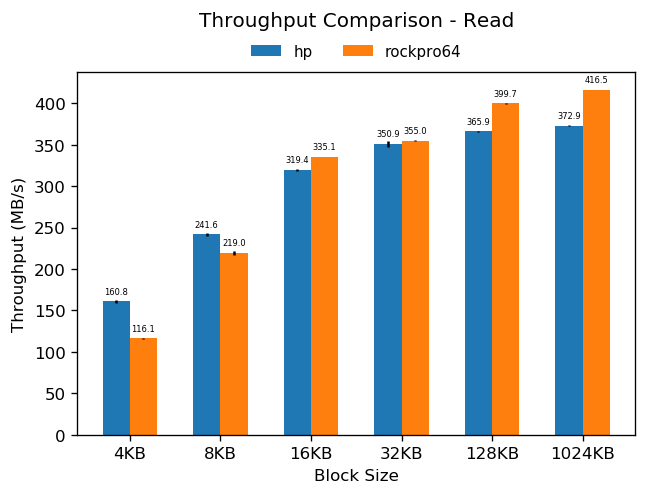

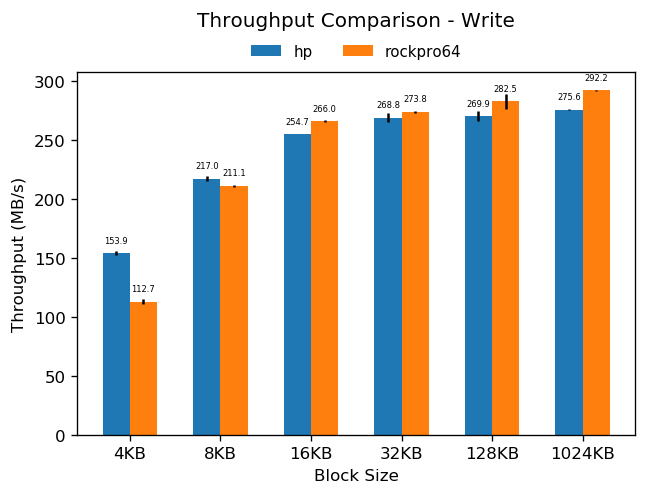

In [2]:
plot_throughput_comp({
    'hp':        'hp/throughput/2',
    'rockpro64': 'rockpro64/throughput/1'
})

All the performance numbers from HP ProLiant machine do not saturate 1 CPU core, while the numbers for 4KB and 8KB from RockPro64 board are limited by the BIG core (2.0 GHz) performance. Note that all the tests only employ 1 thread. It is obviously that all the numbers of other block sizes (16KB - 1024KB) from the RockPro64 platform are slightly greater than the HP ProLiant platform.

---
To verify all the steady state numbers are reproducible and the test method is reliable for other SSD drives, we run the same tests on a second SSD to see if the result profiles are consistent. The serial numbers of the drive is the 12 characters after the GB size. The follow results are generated on the RockPro64 platform.

### Verification Comparison for Results from **RockPro64**

#### 256GB-15NS100WT9JW vs. 128GB-75AS1011T9HW

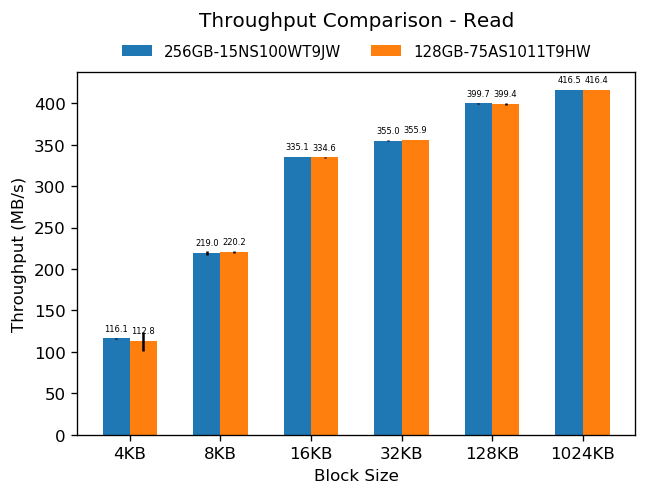

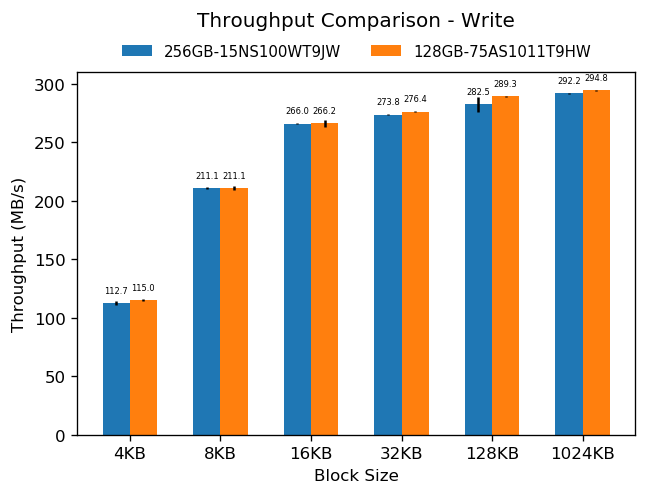

In [3]:
plot_throughput_comp({
    '256GB-15NS100WT9JW': 'rockpro64/throughput/1',
    '128GB-75AS1011T9HW': 'rockpro64/throughput/2'
})

These two drives are the same Toshiba HG6 client SSD series. Here is the link for the detail specification of them https://business.toshiba-memory.com/content/dam/toshiba-ss/asia-pacific/docs/product/storage/product-manual/cSSD-HG6Z-Product-Manual.pdf

The throughput numbers of these two SSDs are highly consistent. However, the IOPS numbers on the [IOPS comparison notebook](iops_comparison.ipynb) express some level of differences as the block sizes go smaller. This is the case we haven't expected before. To further verify the test method and the results, we run the performance tests on two 128GB drives of the same model. The results show as follows.

#### 128GB-75AS1011T9HW vs. 128GB-75AS1005T9HW

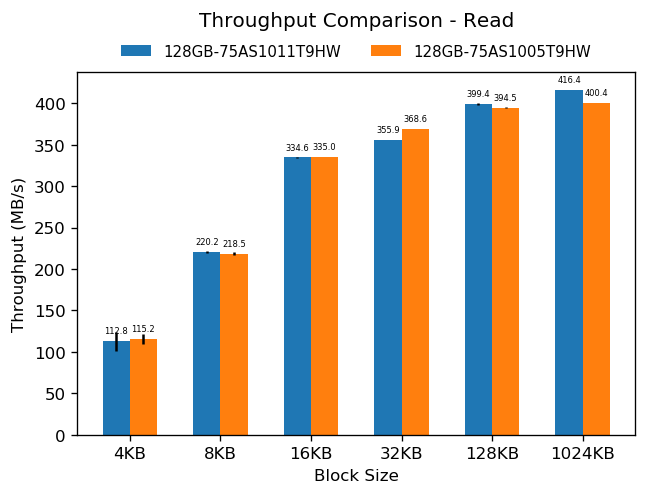

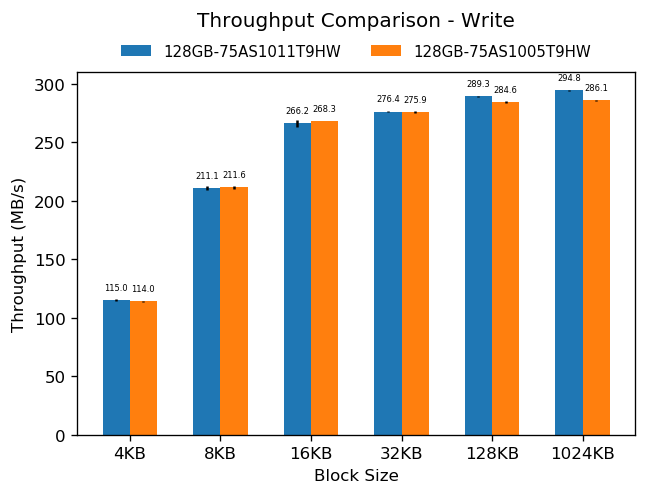

In [4]:
plot_throughput_comp({
    '128GB-75AS1011T9HW': 'rockpro64/throughput/2',
    '128GB-75AS1005T9HW': 'rockpro64/throughput/3'
})

The above results are said to be consistent with the greatest difference of 16MB (4%) on the read with the block size of 1024KB.

#### 256GB-15NS100WT9JW vs. 256GB-55MS101IT9JW

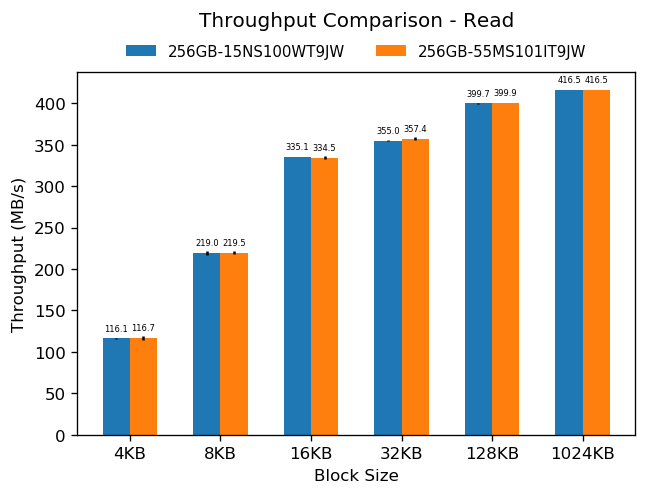

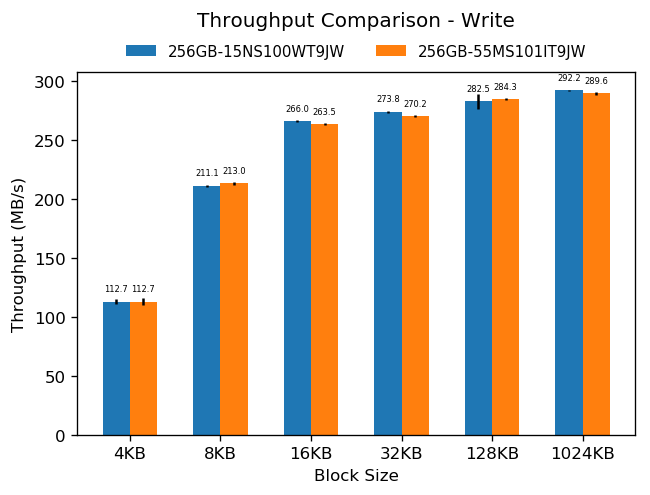

In [5]:
plot_throughput_comp({
    '256GB-15NS100WT9JW': 'rockpro64/throughput/1',
    '256GB-55MS101IT9JW': 'rockpro64/throughput/4'
})

The result numbers from these two 256GB drives are also highly consistent.

---
---
---
Because of the performance oscillation, we decided to descard the use of the 256GB-15NS100WT9JW SSD.

#### Platform comparison between Philip Kufeldt's and Jianshen Liu's RockPro64 board with the **128GB-75AS1011T9HW** drive

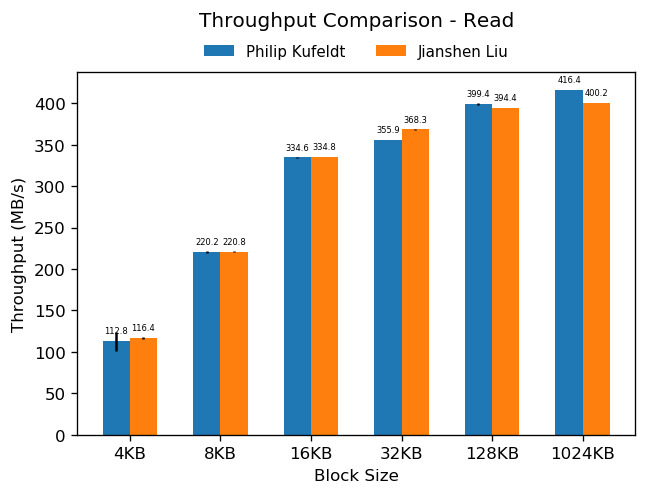

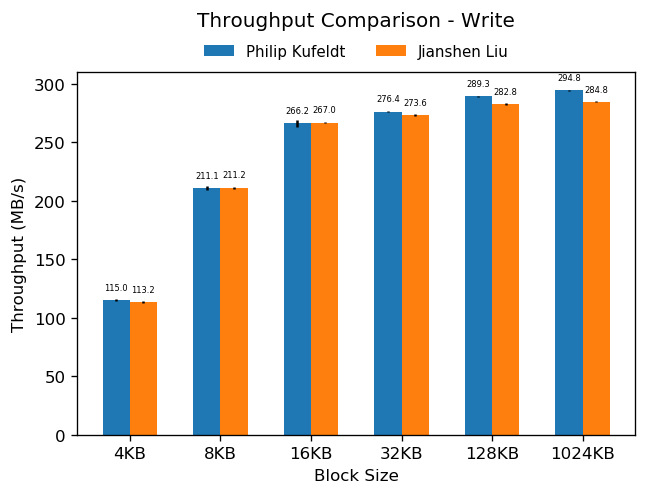

In [6]:
plot_throughput_comp({
    'Philip Kufeldt': 'rockpro64/throughput/2',
    'Jianshen Liu':   'rockpro64/throughput/5'
})

The above results are said to be consistent with the greatest difference of 16.26MB (4.1%) on the read with the block size of 1024KB.

#### Platform comparison between Philip Kufeldt's and Jianshen Liu's RockPro64 board with the **256GB-55MS101IT9JW** drive

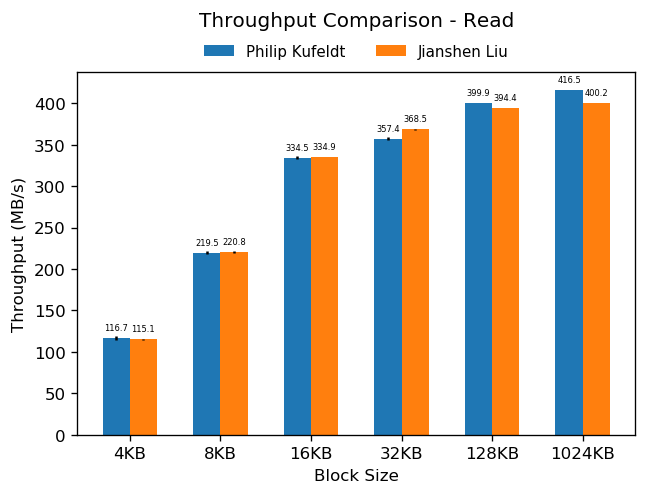

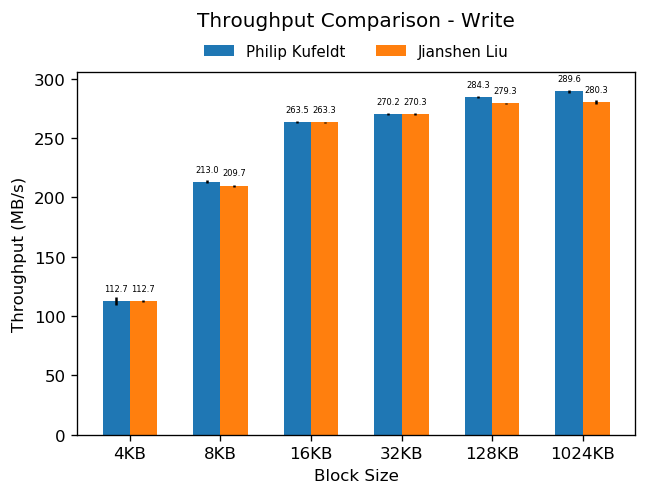

In [7]:
plot_throughput_comp({
    'Philip Kufeldt': 'rockpro64/throughput/4',
    'Jianshen Liu':   'rockpro64/throughput/6'
})

The above results are still said to be consistent with the greatest difference of 16.31MB (4.1%) on the read with the block size of 1024KB.

---
---
---

Based on the above analysis, we think the drive **128GB-75AS1011T9HW** is stable enough across 2 RockPro64 platforms and other drives of the same model. We will use this drive in the test platform in all later steps. (Performance of drive 256GB-55MS101IT9JW is also stable but here we just don't use this one.)

#### Platform throughput comparison with drive **128GB-75AS1011T9HW**

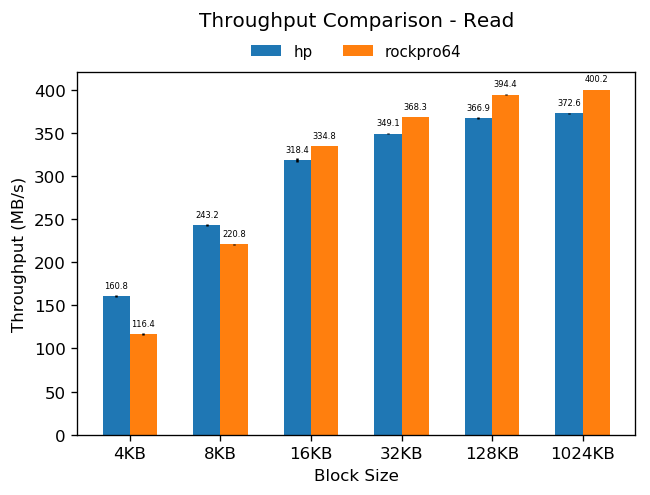

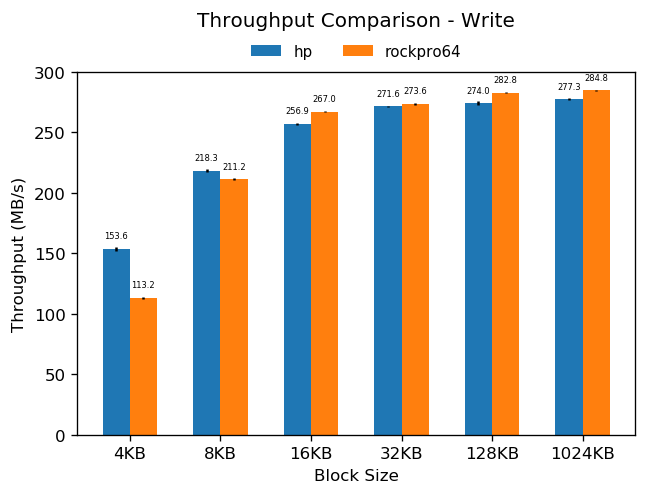

In [8]:
plot_throughput_comp({
    'hp':        'hp/throughput/3',
    'rockpro64': 'rockpro64/throughput/5'
})

As mentioned before, the result numbers of 4KB and 8KB block sizes from the rockpro64 platform are limited by 1 BIG cpu core (since the test only employs one thread). And all the other result numbers do not saturate 1 CPU core. We still see that, except the 4KB and 8KB cases, the rockpro64 platform performs better than the hp.